In [ ]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 20
matplotlib.rcParams['axes.titlesize'] = 20

%matplotlib inline

In [26]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [27]:
df = pd.read_csv('./unet_vgg16_records_1.csv')

df.head(20)

,batchsize,fold,freeze_layer,highest_val_acc,lowest_val_loss,threshold_max,mAP_max,threshold_max_augmentation,mAP_max_augmentation
0,64.0,1.0,7.0,0.968488,0.085157,0.653061,0.727250,0.530612,0.739625
1,64.0,2.0,7.0,0.965227,0.094889,0.632653,0.695250,0.714286,0.708250
2,64.0,3.0,7.0,0.967459,0.083858,0.816327,0.710375,0.693878,0.722875
3,64.0,1.0,8.0,0.966880,0.090157,0.755102,0.709375,0.591837,0.710125
4,64.0,2.0,8.0,0.967326,0.088043,0.816327,0.702500,0.693878,0.704750
5,64.0,3.0,8.0,0.974075,0.069444,0.653061,0.736625,0.632653,0.751625
6,64.0,1.0,9.0,0.964948,0.096927,0.755102,0.717500,0.755102,0.729500
7,64.0,2.0,9.0,0.970875,0.087678,0.693878,0.737625,0.653061,0.745875
8,64.0,3.0,9.0,0.965165,0.095618,0.816327,0.687000,0.734694,0.705625
9,64.0,1.0,10.0,0.974178,0.069526,0.734694,0.754000,0.632653,0.760625


In [28]:
# df.head()

agged = df.groupby(['freeze_layer','batchsize']).agg(np.mean).reset_index()

# agged.head(20).sort_values('mAP_max_augmentation', ascending=False)

In [29]:
agged

,freeze_layer,batchsize,fold,highest_val_acc,lowest_val_loss,threshold_max,mAP_max,threshold_max_augmentation,mAP_max_augmentation
0,7.0,64.0,2.0,0.967058,0.087968,0.700680,0.710958,0.646259,0.723583
1,8.0,64.0,2.0,0.969427,0.082548,0.741497,0.716167,0.639456,0.722167
2,9.0,64.0,2.0,0.966996,0.093408,0.755102,0.714042,0.714286,0.727000
3,10.0,64.0,2.0,0.972834,0.075872,0.700680,0.741875,0.625850,0.750917
4,11.0,64.0,2.0,0.967403,0.090248,0.646259,0.719583,0.591837,0.730958
5,12.0,64.0,2.0,0.966380,0.092531,0.659864,0.709292,0.598639,0.726875
6,13.0,64.0,1.5,0.964185,0.098436,0.469388,0.687750,0.489796,0.706313


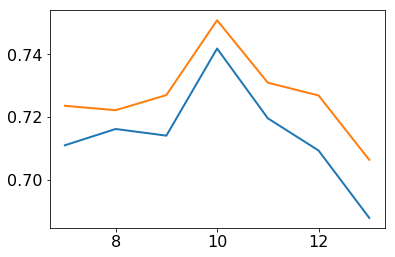

In [31]:
plt.plot(agged['freeze_layer'],agged['mAP_max'])
plt.plot(agged['freeze_layer'],agged['mAP_max_augmentation'])


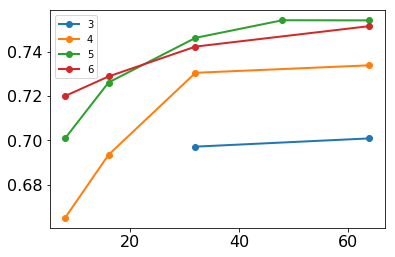

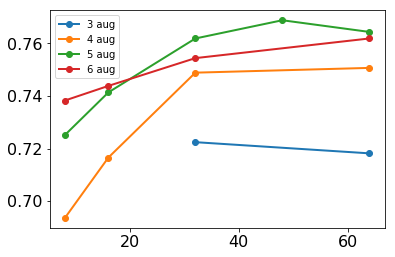

In [24]:
curr = agged[(agged['depth']==3) & (agged['batchsize']==64)]; plt.plot(curr['filter_scaling'], curr['mAP_max'], 'o-', label='3')
curr = agged[(agged['depth']==4) & (agged['batchsize']==64)]; plt.plot(curr['filter_scaling'], curr['mAP_max'], 'o-', label='4')
curr = agged[(agged['depth']==5) & (agged['batchsize']==64)]; plt.plot(curr['filter_scaling'], curr['mAP_max'], 'o-', label='5')
curr = agged[(agged['depth']==6) & (agged['batchsize']==64)]; plt.plot(curr['filter_scaling'], curr['mAP_max'], 'o-', label='6')
plt.legend(); plt.show()
curr = agged[(agged['depth']==3) & (agged['batchsize']==64)]; plt.plot(curr['filter_scaling'], curr['mAP_max_augmentation'], 'o-', label='3 aug')
curr = agged[(agged['depth']==4) & (agged['batchsize']==64)]; plt.plot(curr['filter_scaling'], curr['mAP_max_augmentation'], 'o-', label='4 aug')
curr = agged[(agged['depth']==5) & (agged['batchsize']==64)]; plt.plot(curr['filter_scaling'], curr['mAP_max_augmentation'], 'o-', label='5 aug')
curr = agged[(agged['depth']==6) & (agged['batchsize']==64)]; plt.plot(curr['filter_scaling'], curr['mAP_max_augmentation'], 'o-', label='6 aug')
plt.legend(); plt.show()

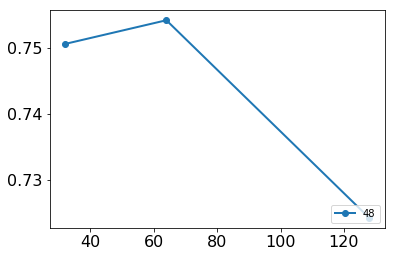

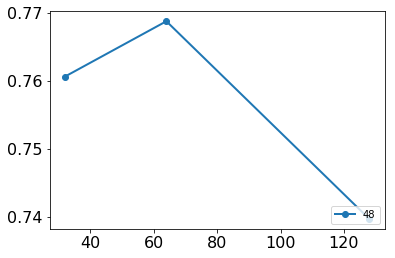

In [17]:
curr = agged[agged['filter_scaling']==48]; plt.plot(curr['batchsize'], curr['mAP_max'], 'o-', label='48')
plt.legend(loc='lower right'); plt.show()
curr = agged[agged['filter_scaling']==48]; plt.plot(curr['batchsize'], curr['mAP_max_augmentation'], 'o-', label='48')
plt.legend(loc='lower right'); plt.show()

In [18]:
# df.head(60).sort_values('lowest_val_loss')
df.head(100).sort_values('mAP_max_augmentation', ascending=False)

,filter_scaling,depth,batchsize,fold,highest_val_acc,lowest_val_loss,threshold_max,mAP_max,threshold_max_augmentation,mAP_max_augmentation
43,64.0,5.0,64.0,4.0,0.976460,0.070588,0.591837,0.775500,0.632653,0.788500
54,48.0,5.0,64.0,2.0,0.973020,0.074865,0.612245,0.760875,0.673469,0.774625
42,64.0,5.0,64.0,3.0,0.974831,0.065261,0.693878,0.765125,0.551020,0.774500
28,32.0,5.0,64.0,1.0,0.975162,0.068926,0.510204,0.759750,0.510204,0.772875
56,48.0,5.0,64.0,4.0,0.971162,0.079988,0.734694,0.755625,0.653061,0.772625
29,32.0,5.0,64.0,2.0,0.976019,0.069484,0.612245,0.758750,0.632653,0.771750
58,48.0,5.0,32.0,2.0,0.972628,0.068207,0.591837,0.760500,0.510204,0.770250
53,48.0,5.0,64.0,1.0,0.970243,0.087997,0.693878,0.747375,0.591837,0.764125
55,48.0,5.0,64.0,3.0,0.971337,0.074180,0.734694,0.752750,0.591837,0.763875
23,16.0,6.0,64.0,4.0,0.972719,0.090320,0.551020,0.745750,0.551020,0.763375


In [19]:
df2 = pd.read_csv('./optimal_parameters_0_to_1_image_scaling_1.csv')


In [20]:
df2.head()

,filter_scaling,depth,batchsize,fold,highest_val_acc,lowest_val_loss,threshold_max,mAP_max,threshold_max_augmentation,mAP_max_augmentation
0,48.0,5.0,64.0,1.0,0.973042,0.077455,0.571429,0.766000,0.489796,0.77525
1,48.0,5.0,64.0,2.0,0.972815,0.075614,0.714286,0.749625,0.530612,0.76325
2,48.0,5.0,64.0,3.0,0.971643,0.079027,0.591837,0.750625,0.571429,0.75425
3,48.0,5.0,64.0,4.0,0.974205,0.080568,0.591837,0.735875,0.673469,0.75725


In [71]:
df3 = pd.read_csv('./batch_norm_momentum_1.csv')

df3.head(50)

,filter_scaling,depth,batchsize,fold,bn_momentum,highest_val_acc,lowest_val_loss,threshold_max,mAP_max,threshold_max_augmentation,mAP_max_augmentation
0,48.0,5.0,64.0,1.0,0.9,0.978743,0.062583,0.734694,0.767875,0.571429,0.783375
1,48.0,5.0,64.0,2.0,0.9,0.970294,0.084326,0.551020,0.715375,0.530612,0.726500
2,48.0,5.0,64.0,3.0,0.9,0.973649,0.076744,0.632653,0.753875,0.591837,0.757500
3,48.0,5.0,64.0,4.0,0.9,0.970026,0.080295,0.632653,0.753000,0.571429,0.759250
4,48.0,5.0,64.0,1.0,0.8,0.971751,0.079996,0.693878,0.731125,0.591837,0.750375
5,48.0,5.0,64.0,2.0,0.8,0.972095,0.077665,0.632653,0.764750,0.653061,0.771875
6,48.0,5.0,64.0,3.0,0.8,0.971251,0.081295,0.551020,0.746750,0.591837,0.758625
7,48.0,5.0,64.0,4.0,0.8,0.973291,0.072399,0.571429,0.758875,0.551020,0.766250
8,48.0,5.0,64.0,1.0,0.7,0.973550,0.074871,0.714286,0.748750,0.734694,0.759750
9,48.0,5.0,64.0,2.0,0.7,0.974965,0.069632,0.693878,0.755625,0.591837,0.776500


In [72]:
agged3 = df3.groupby(['filter_scaling','depth','batchsize','bn_momentum']).agg(np.mean).reset_index()

agged3.head(20)

,filter_scaling,depth,batchsize,bn_momentum,fold,highest_val_acc,lowest_val_loss,threshold_max,mAP_max,threshold_max_augmentation,mAP_max_augmentation
0,48.0,5.0,64.0,0.5,2.5,0.971326,0.079965,0.637755,0.740813,0.602041,0.759281
1,48.0,5.0,64.0,0.6,2.5,0.973618,0.074939,0.561224,0.756719,0.505102,0.769281
2,48.0,5.0,64.0,0.7,2.5,0.972824,0.074894,0.647959,0.750969,0.647959,0.763781
3,48.0,5.0,64.0,0.8,2.5,0.972097,0.077839,0.612245,0.750375,0.596939,0.761781
4,48.0,5.0,64.0,0.9,2.5,0.973178,0.075987,0.637755,0.747531,0.566327,0.756656


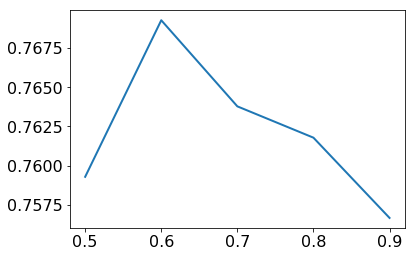

In [73]:
plt.plot(agged3['bn_momentum'], agged3['mAP_max_augmentation'])